# Clustering Algorithms:
Let's begin with our usual set of initial imports.

In [118]:
# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set the default plotting style to 'seaborn'
plt.style.use('seaborn')

# Set the figure size and resolution for plots
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<ipython-input-118-e585366206bc>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## K-Means Clustering:
K-Means is an algorithm for **unsupervised clustering**, meaning it identifies clusters in the data solely based on the data attributes, without using any labels.

K-Means is fairly intuitive. It identifies cluster centers by computing the mean of the points within each cluster, and each point is assigned to the cluster whose center is closest to it.

Now, let's see how K-Means performs on the simple clusters we've examined earlier. To highlight its unsupervised nature, we won’t display the cluster colors in the plot.

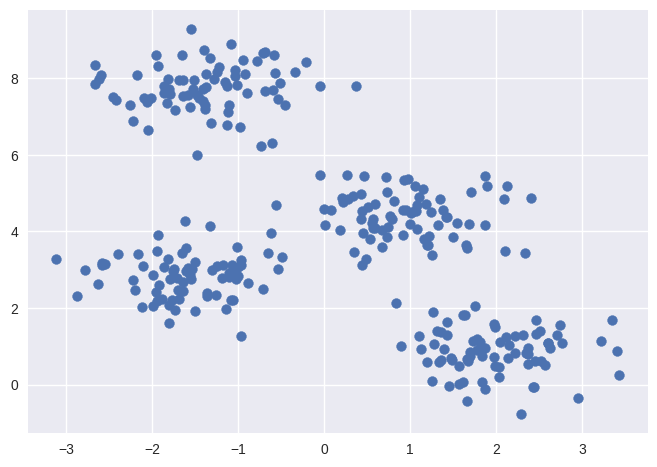

In [119]:
# Import the function to generate synthetic data
from sklearn.datasets import make_blobs

# Generate data points with 4 clusters
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Plot the generated data as a scatter plot
plt.scatter(X[:, 0], X[:, 1], s=50)

Visually, identifying the four clusters is quite straightforward. However, if you were to exhaustively search for all possible segmentations of the data, the search space would grow exponentially with the number of points. Thankfully, there is a well-established *Expectation Maximization (EM)* procedure, which is implemented in scikit-learn, allowing K-Means to be solved efficiently.

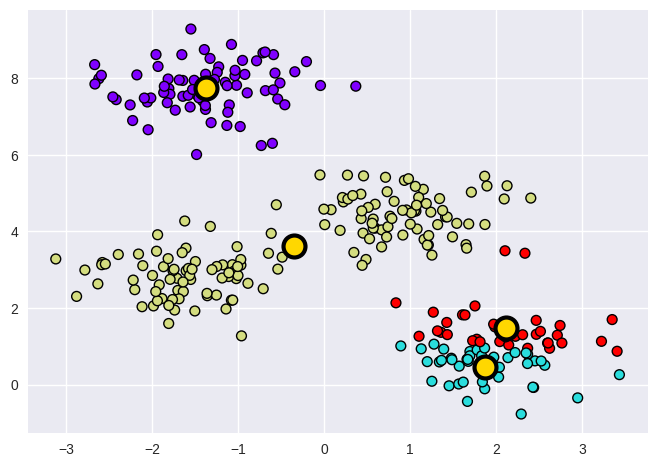

In [120]:
# Import the KMeans clustering algorithm
from sklearn.cluster import KMeans

# Initialize KMeans with 4 clusters
est = KMeans(4)

# Fit the model to the data
est.fit(X)

# Predict the cluster labels for the data points
y_kmeans = est.predict(X)

# Plot the clustered data points with color coding for clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow', edgecolor='black', linewidth=1)

# Mark the cluster centers with larger, gold-colored points
plt.scatter(est.cluster_centers_[:, 0], est.cluster_centers_[:, 1], s=250, color="gold", edgecolor='black', linewidth=3)

The clustering is learned and adapted to the dataset, but it also creates a **partition of the space**. If a new data point is introduced, we can still determine which cluster it belongs to without needing to rerun the clustering algorithm.

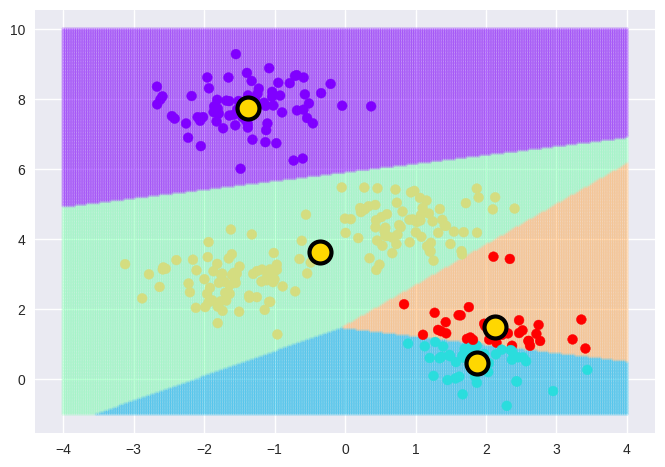

In [121]:
# Create a linear space for the x and y coordinates, generating 256 points
gx = np.linspace(-4, 4, 256)  # x values ranging from -4 to 4
gy = np.linspace(-1, 10, 256)  # y values ranging from -1 to 10


gx, gy = np.meshgrid(gx, gy) # Generate a mesh grid from the x and y vectors
gx, gy = gx.reshape(-1), gy.reshape(-1) # Reshape the mesh grid arrays into 1D vectors

# Predict the cluster labels for the grid points
y_hat = est.predict(np.c_[gx, gy])  # Combine gx and gy into a Nx2 matrix

# Plot the predicted clusters for the grid points with low opacity
plt.scatter(gx, gy, c=plt.cm.rainbow(y_hat / 4), alpha=0.2, s=5)

# Overlay the original data points colored by their cluster labels
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')

# Mark the cluster centers with larger, gold-colored points
plt.scatter(est.cluster_centers_[:, 0], est.cluster_centers_[:, 1], s=250, color="gold", edgecolor='black', linewidth=3)

The algorithm identifies the four clusters of points in a way that closely resembles how we would do it visually!

### The K-Means Algorithm: Expectation Maximization

K-Means exemplifies an algorithm that employs an *Expectation-Maximization* approach to find its solution. The *Expectation-Maximization* process consists of two steps:

* Initialize some cluster centers.
* Repeat until convergence:
  1.   Assign points to the nearest cluster center; (MAX)
  2.   Update the cluster centers to the mean of the assigned points. (EXP)

Let’s quickly visualize this process:

[Visualize EM for K-Means](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)  (Select the distribution with 2 and 3 clusters.)



### K-Means Caveats
This algorithm will (often) converge to the optimal cluster centers.
The convergence of this algorithm is not assured; for this reason, scikit-learn defaults to using multiple random initializations to identify the best results.

Additionally, the number of clusters must be specified in advance. There are other clustering algorithms that do not have this requirement.

### Application of KMeans to Digits

To explore a more practical example, let's revisit the digits dataset. In this case, we'll utilize KMeans to automatically cluster the data in 64 dimensions and then examine the cluster centers to understand what the algorithm has discovered.

In [122]:
# Import the digits dataset from sklearn
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()

# Initialize KMeans with 10 clusters for the digit classes
est = KMeans(n_clusters=10)

# Fit the KMeans model to the digit data and predict cluster assignments
clusters = est.fit_predict(digits.data)

# Display the shape of the cluster centers
print("Shape of the cluster centers: ", est.cluster_centers_.shape)

Shape of the cluster centers:  (10, 64)


We observe ten clusters in $64$ dimensions. Now, let's visualize each of these cluster centers to understand what they represent:

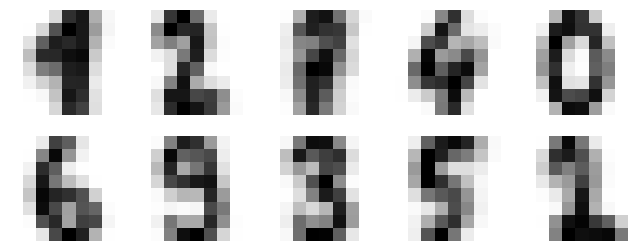

In [123]:
# Create a figure to visualize the cluster centers
fig = plt.figure(figsize=(8, 3))

# Loop through each cluster center to display them
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])  # Arrange subplots in a 2x5 grid; disable x and y ticks
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)  # Display each cluster center as a grayscale image

We can see that even **without the labels**, K-Means successfully identifies clusters whose means resemble recognizable digits!

The cluster labels are permuted; let’s correct this:

In [124]:
# Import the mode function from scipy.stats
from scipy.stats import mode

# Initialize an array to hold the assigned labels, matching the shape of clusters
labels = np.zeros_like(clusters)  # Create an array of zeros with the same shape as 'clusters'

# Loop through each cluster to assign labels based on the mode
for i in range(10):
    mask = (clusters == i)  # Create a mask for the current cluster
    labels[mask] = mode(digits.target[mask])[0]  # Assign the mode label for each point in cluster "i"

For good measure, let's use our PCA visualization and look at the true cluster labels and K-means cluster labels:

<ipython-input-125-2c8629cd8870>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  kwargs = dict(cmap=plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)


Text(0.5, 1.0, 'True Labels')

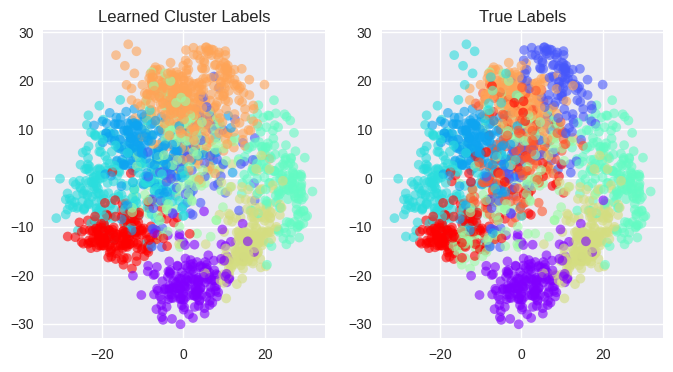

In [125]:
# Import PCA from sklearn for dimensionality reduction
from sklearn.decomposition import PCA

# Reduce the dimensionality of the digits dataset to 2 components
X = PCA(2).fit_transform(digits.data)

# Define common plotting parameters for scatter plots
kwargs = dict(cmap=plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Scatter plot of learned cluster labels
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('Learned Cluster Labels')

# Scatter plot of true labels from the digits dataset
ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('True Labels')

Just for fun, let's evaluate how accurate our K-Means classifier is **without any label information:**

In [126]:
# Import the accuracy_score function from sklearn.metrics
from sklearn.metrics import accuracy_score

# Calculate and return the accuracy of the learned labels compared to the true labels
accuracy_score(digits.target, labels)

0.7451307735114079

An accuracy of $80\%$ — not bad! Now, let’s take a look at the **confusion matrix** for this:

Confusion Matrix: 
 [[177   0   0   0   1   0   0   0   0   0]
 [  0  57  27   0   0   1   2  95   0   0]
 [  1   2 159   3   0   0   0  12   0   0]
 [  0   0   1 162   0   2   0  11   0   7]
 [  0   7   0   0 163   1   0  10   0   0]
 [  0   0   0   2   1 139   2   0   0  38]
 [  1   1   0   0   0   0 178   1   0   0]
 [  0   5   0   0   1   9   0 164   0   0]
 [  1   8   8  54   0   7   2  91   0   3]
 [  0  20   0   5   0  11   0   4   0 140]] 



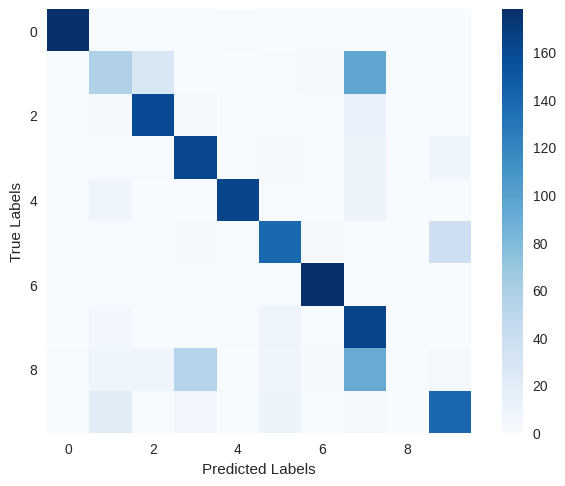

In [127]:
# Import the confusion_matrix function from sklearn.metrics
from sklearn.metrics import confusion_matrix

# Calculate and print the confusion matrix comparing true and predicted labels
print("Confusion Matrix: \n", confusion_matrix(digits.target, labels), "\n")

# Visualize the confusion matrix as an image
plt.imshow(confusion_matrix(digits.target, labels), cmap='Blues', interpolation='nearest')
plt.colorbar()  # Add a color bar to indicate the scale
plt.grid(False)  # Disable the grid for clarity
plt.ylabel('True Labels')  # Label for the y-axis
plt.xlabel('Predicted Labels');  # Label for the x-axis

Once again, this is an $80\%$ classification accuracy achieved by an **entirely unsupervised estimator** that had no prior knowledge of the labels.

### Example: K-Means for Color Compression

A fascinating application of clustering is color image compression. For instance, consider an image containing millions of colors. In many images, numerous colors may remain unused, while a significant number of pixels will share similar or identical colors.

Scikit-learn provides several images for experimentation, accessible via the datasets module. For example:

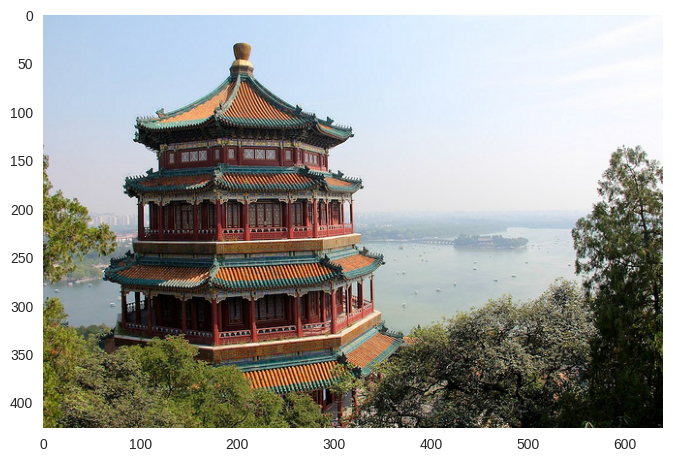

In [128]:
# Import the function to load sample images from sklearn
from sklearn.datasets import load_sample_image

# Load the sample image of China
china = load_sample_image("china.jpg")

# Display the loaded image
plt.imshow(china)
plt.grid(False)  # Disable the grid overlay on the image

The image is represented as a 3-dimensional array with dimensions ``(height, width, RGB)``:

In [129]:
# Print the dimensions of the loaded image
print("Shape of the image: ", china.shape, "\n")

# Display the RGB values of the pixel located at [3, 4]
print('The RGB values of the pixel [3, 4] are:', china[3, 4, :])


Shape of the image:  (427, 640, 3) 

The RGB values of the pixel [3, 4] are: [174 201 231]


We can visualize this image as a cloud of points in a 3-dimensional color space. We'll rescale the colors to fall between 0 and 1 and then reshape the array to conform to the typical input format for scikit-learn:

In [130]:
# Normalize the pixel values of the image and reshape it into a 2D array
X = (china / 255.0).reshape(-1, 3)  # The "-1" allows for automatic row calculation based on the total number of pixels

# Print the shape of the reshaped array
print("Reshaped images has dimension: ", X.shape)

Reshaped images has dimension:  (273280, 3)


We now have $273280$ points in 3 dimensions.

Each of the $273280$ pixels is represented by **three numbers ranging from 0 to 255**. In image processing, this is referred to as "*24 bits per pixel*" (bpp) since it requires exactly 24 bits of memory to store the three color values for each pixel ($256^3=2^{24}$).

Our objective is to utilize K-Means to compress the $256^3$ colors into a smaller palette (for instance, 64 colors, which equates to 6 bpp—a commonly used image compression method). Essentially, we aim to identify $N_{color}$ clusters within the data and generate a new image where each original color is replaced by the color of the nearest cluster.

Here, we will employ ``MiniBatchKMeans``, a more advanced estimator that performs better with larger datasets:

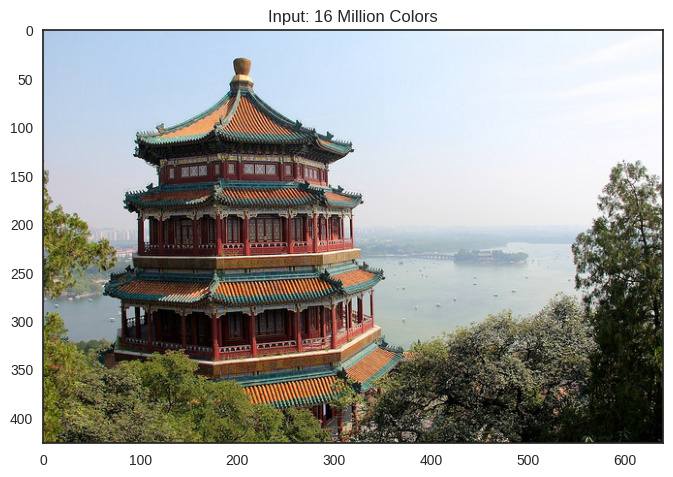

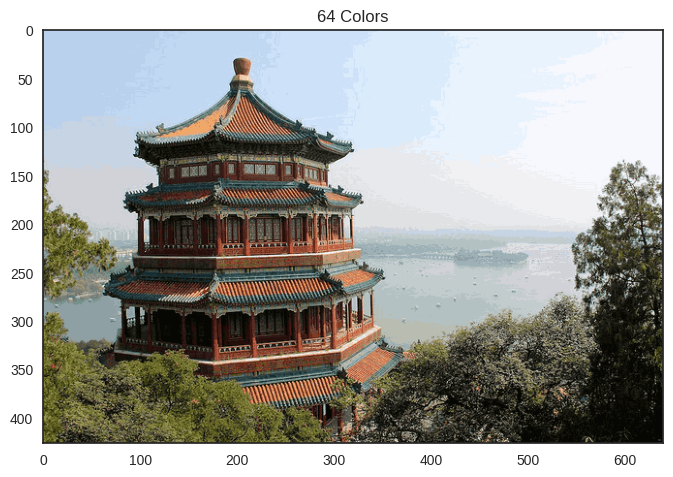

In [131]:
# Import the MiniBatchKMeans algorithm for faster K-means clustering
from sklearn.cluster import MiniBatchKMeans  # Iterations of K-means are performed on random subsets to enhance computation speed

# Set the number of colors to reduce the size of the image for faster processing
n_colors = 64  # What happens if you set this to 2?

# Create and fit the MiniBatchKMeans model to the pixel data
model = MiniBatchKMeans(n_colors)
labels = model.fit_predict(X)

# Retrieve the cluster centers (representative colors) from the model
colors = model.cluster_centers_

# Create a new image using the clustered colors and reshape it to the original image dimensions
new_image = colors[labels].reshape(china.shape)
new_image = (255 * new_image).astype(np.uint8)  # Convert back to uint8 format for display

# Create and plot the original and new images
with plt.style.context('seaborn-white'):
    plt.figure()
    plt.imshow(china)
    plt.title('Input: 16 Million Colors')

    plt.figure()
    plt.imshow(new_image)
    plt.title('{0} Colors'.format(n_colors))


Compare the input and output images: we've reduced the $256^3$ colors down to just $64$ ($4^3$).

### How to Decide the Number of Clusters?

In the case of the blobs, it was clear that there were 4 distinct clusters; for the digits, we know there are 10 numbers; and with the colors, we have the reference from image compression techniques. But what if we lack any reference?

One potential strategy is to ensure that our clusters are based on the properties of the data. A useful approach is to split the dataset into two parts and then observe how the clustering behaves as we increase the number of clusters:

interactive(children=(IntSlider(value=4, description='N', max=7, min=1), Output()), _dom_classes=('widget-inte…

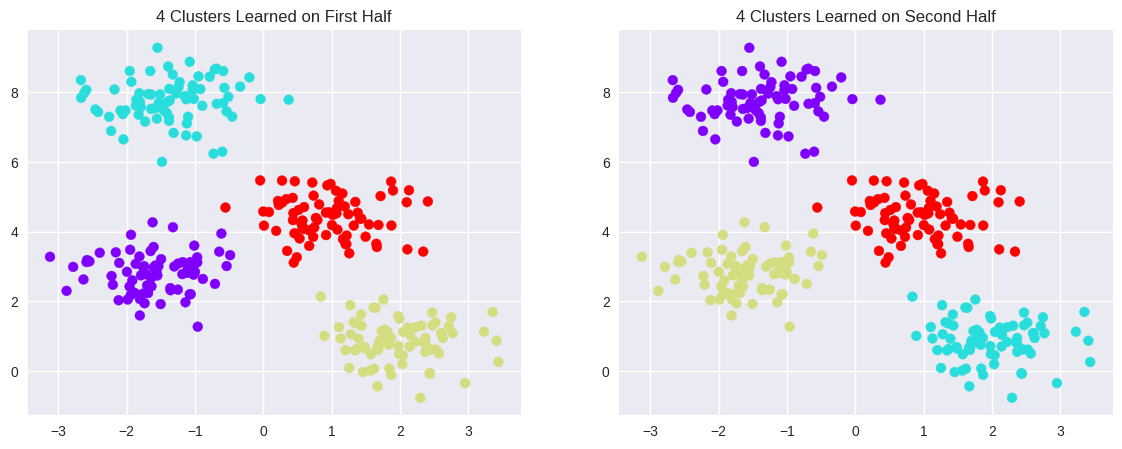

In [132]:
# Generate synthetic data with 300 samples and 4 centers
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

# Define a function to try different numbers of clusters
def try_N_clusters(N):
    # Create and fit the KMeans model for the first half of the data
    model_1 = KMeans(N)  # N clusters
    model_1.fit(X[0:150, :])
    y_model_1 = model_1.predict(X)  # Predict clusters for all data

    # Create and fit the KMeans model for the second half of the data
    model_2 = KMeans(N)  # N clusters
    model_2.fit(X[150:, :])
    y_model_2 = model_2.predict(X)  # Predict clusters for all data

    # Create subplots to visualize the clustering results
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].scatter(X[:, 0], X[:, 1], c=y_model_1, s=50, cmap='rainbow')
    ax[0].set_title(str(N) + ' Clusters Learned on First Half')

    ax[1].scatter(X[:, 0], X[:, 1], c=y_model_2, s=50, cmap='rainbow')
    ax[1].set_title(str(N) + ' Clusters Learned on Second Half')

# Import interact from ipywidgets to create interactive plots
from ipywidgets import interact
interact(try_N_clusters, N=(1, 7));  # Create an interactive slider for the number of clusters

It is clear that exceeding 5 clusters leads to fitting the noise in the data, resulting in a division between the two partitions that lacks coherence.

# How to Pick the Right Clustering Algorithm?

The best clustering algorithm really depends on the dataset you’re working with. If the data is low-dimensional, you can easily check what’s happening during clustering, but those cases are often where clustering isn’t super useful. There’s no clear-cut answer for which algorithm to choose, but here are some handy tips:

* **Try Out Different Algorithms**: If the cluster results don’t change much across different methods, you probably don’t need to stress too much about which one you pick.

* **Make It Low-Dimensional**: If you can visualize the data in fewer dimensions, you can better see if the clusters make sense. It’s a bonus if the dimensionality reduction and clustering techniques align well, as that gives you a solid reason for your choices.

* **Are the Cluster Centers Meaningful?**: Can you roughly represent the points in a cluster using its center? If you can, you’re likely on the right track.

We also have a reference showing how various clustering methods work with different types of datasets. You’ll see that some techniques fit better than others depending on the situation.

![Clustering Techniques](https://miro.medium.com/max/1200/1*oNt9G9UpVhtyFLDBwEMf8Q.png)


# Exercise:

1. Run k-means on the iris dataset using the first two features for a 2D projection. Then apply PCA;
2. Determine a good number of clusters.
**Question:**  Do the clusters match the labels? Is k-means consistent with PCA?

In [133]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)


# Clustering and Density Estimation: Gaussian Mixture Models
We previously saw an example of K-Means, which is a clustering algorithm which is most often fit using an expectation-maximization approach.

Here we'll consider an extension to this which is suitable for both **clustering** and **density estimation**.

For example, imagine we have some one-dimensional data in a particular distribution:

(-10.0, 20.0)

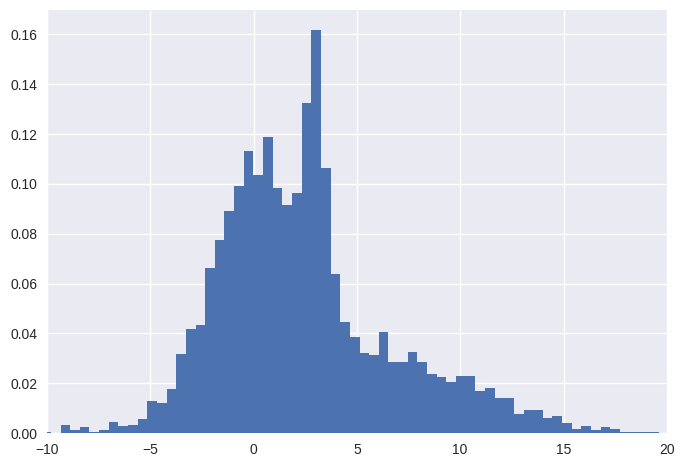

In [134]:
# Set the random seed for reproducibility
np.random.seed(2)

# Generate three Gaussian-distributed datasets and concatenate them
x = np.concatenate([
    np.random.normal(0, 2, 2000),   # First Gaussian with mean=0, std=2
    np.random.normal(5, 5, 2000),   # Second Gaussian with mean=5, std=5
    np.random.normal(3, 0.5, 600)   # Third Gaussian with mean=3, std=0.5
])
x = x.reshape(-1, 1)  # Reshape the array for consistency

# Create and display a histogram of the concatenated data
plt.hist(x, 80, density=True)  # density=True normalizes the histogram
plt.xlim(-10, 20)  # Set the x-axis limits


Gaussian mixture models will help us approximate this density. Let's try using four Gaussian distributions:

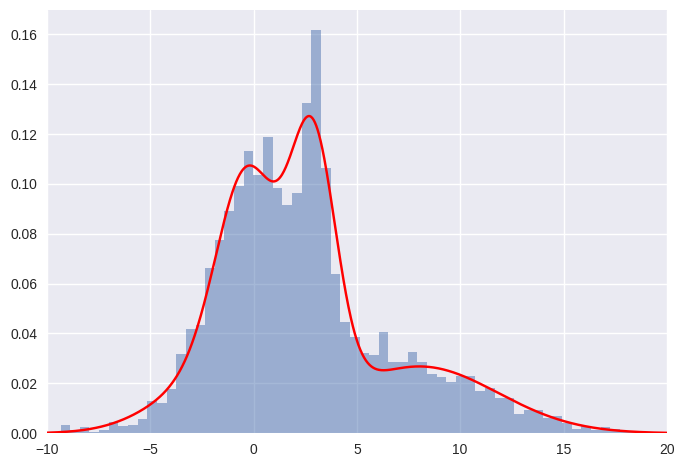

In [135]:
# Import the Gaussian Mixture Model (GMM) class from sklearn
from sklearn.mixture import GaussianMixture as GMM

# Fit a Gaussian Mixture Model with 4 components
clf = GMM(4, max_iter=500, random_state=3).fit(x)

# Define the x-axis for plotting the density
xpdf = np.linspace(-10, 20, 1000)

# Create a vector of density values for each point in xpdf
density = np.array([np.exp(clf.score([[xp]])) for xp in xpdf])  # clf.score[xp] returns the log probability of the GMM at point xp

# Create and display a histogram of the data with an overlaid GMM density plot
plt.hist(x, 80, density=True, alpha=0.5)  # Display the histogram with normalization
plt.plot(xpdf, density, c='red')  # Plot the GMM density in red
plt.xlim(-10, 20);  # Set the x-axis limits



Keep in mind that this density is fitted using a **mixture of Gaussians**. We can analyze it by checking the `means_`, `covars_`, and `weights_` attributes:

In [136]:
print("Means: \n", clf.means_, "\n")
print("Covariances: \n", clf.covariances_, "\n")
print("Weights: \n", clf.weights_)

Means: 
 [[ 8.04894855]
 [-0.26509542]
 [ 2.87628921]
 [-1.762037  ]] 

Covariances: 
 [[[14.2611261 ]]

 [[ 2.1852085 ]]

 [[ 1.25253655]]

 [[ 7.39304484]]] 

Weights: 
 [0.2532411  0.31029078 0.28492403 0.15154409]


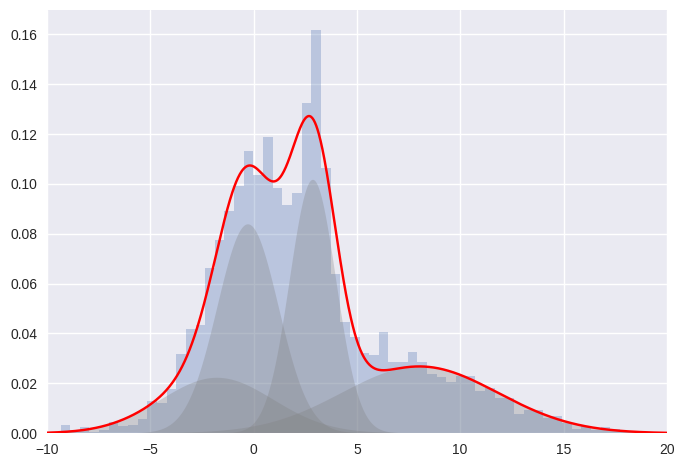

In [137]:
# Plot the histogram of the data with normalization
plt.hist(x, 80, density=True, alpha=0.3)

# Overlay the Gaussian Mixture Model density plot
plt.plot(xpdf, density, c='red')

# Loop through each Gaussian component to plot its individual density
for i in range(4):
    # Calculate the probability density function (PDF) for each component
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0], np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    # Fill the area under the curve for each Gaussian component
    plt.fill(xpdf, pdf, facecolor='gray', edgecolor='none', alpha=0.3)  # Evaluate the density of the Gaussian across all points in xpdf

# Set the x-axis limits
plt.xlim(-10, 20);

These individual Gaussian distributions are fitted using an expectation-maximization method, similar to K-Means. However, instead of explicit cluster assignments, the algorithm uses the **posterior probability** to calculate the weighted mean and covariance. Interestingly, this algorithm **provenly** converges to the optimum, although this optimum may not be global.

## How Many Gaussians?

To assess how well a model fits the data, we can use several methods. Two common ones are the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC).

The formulas are:

$$AIC = -2 \cdot \log(P(Data)) + 2 \cdot K$$

$$BIC = -2 \cdot \log(P(Data)) + \log(n) \cdot K$$

Both metrics include a penalty for the number of parameters $K$. In AIC, this penalty is constant, while in BIC, it increases with the number of data points.

In [138]:
print("AIC =", clf.aic(x))
print("BIC =", clf.bic(x))

AIC = 25754.42998281725
BIC = 25825.2019102245


Let’s examine how these criteria change as the number of Gaussians increases:

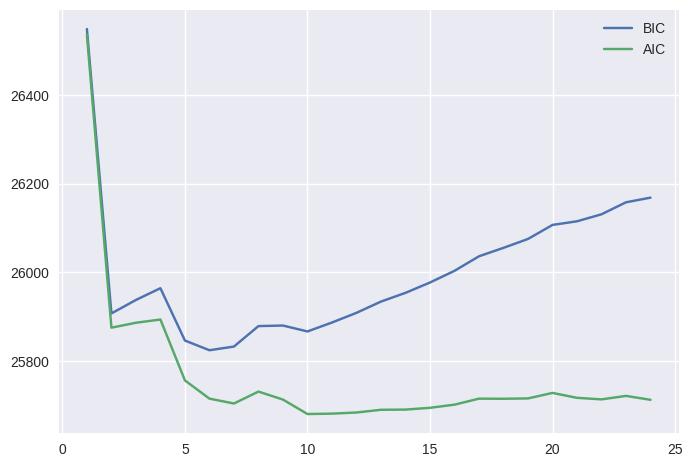

In [139]:
# Define a range of values for the number of Gaussian components (n_estimators)
n_estimators = np.arange(1, 25)

# Create a list of Gaussian Mixture Models (GMM) for each number of components
clfs = [GMM(n, max_iter=1000, random_state=30).fit(x) for n in n_estimators]  # Fit models with up to 24 components

# Calculate the Bayesian Information Criterion (BIC) for each model
bics = [clf.bic(x) for clf in clfs]

# Calculate the Akaike Information Criterion (AIC) for each model
aics = [clf.aic(x) for clf in clfs]

# Plot BIC and AIC values against the number of components
plt.plot(n_estimators, bics, label='BIC')  # Plot BIC values
plt.plot(n_estimators, aics, label='AIC')  # Plot AIC values
plt.legend()  # Show legend

# Note: In sklearn, lower AIC and BIC scores indicate better model fit.

Typically, you look for the elbow point in those curves. In this case, it appears to be between 2 and 6, suggesting that around 4 is a good choice. Since we generated the data using 3 Gaussians, these methods are effective but not infallible.





## Example: GMM for Outlier Detection

GMM is a **Generative Model**, meaning it's a probabilistic model that can generate a dataset. One of the applications of generative models is **outlier detection**: we can evaluate the likelihood of each point according to the generative model. Points with a sufficiently low likelihood (where "sufficiently" depends on your bias/variance preference) can be labeled as outliers.

Now, let’s explore this by creating a new dataset that includes some outliers:

In [140]:
# Set the random seed for reproducibility
np.random.seed(0)

# Generate 20 random indices to identify outliers
true_outliers = np.random.randint(0, x.shape[0], 20)  # Create 20 random indices within the range of x

# Create a flattened version of x for easier manipulation
y = x.reshape(-1)

# Modify the selected outlier indices to create outliers by adding random noise
y[true_outliers] += 50 * np.random.randn(20)  # Adjust the outlier values by adding random noise

# Reshape y back to its original shape
y = y.reshape(-1, 1)

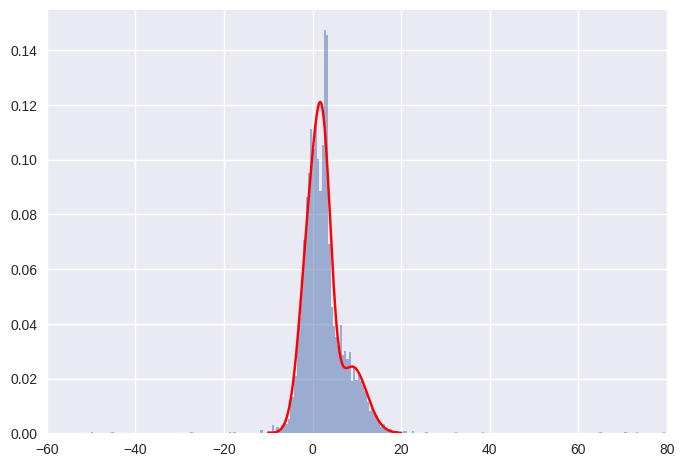

In [141]:
# Fit a Gaussian Mixture Model (GMM) to the data with outliers
clf = GMM(4, max_iter=500, random_state=0).fit(y)  # Build the model using the "dirty" data with 4 components

# Define the x-axis for density plotting
xpdf = np.linspace(-10, 20, 1000)

# Calculate the density of the GMM for the specified x values
density_noise = np.array([np.exp(clf.score([[xp]])) for xp in xpdf])

# Create a histogram of the data with normalization
plt.hist(y, 300, density=True, alpha=0.5)  # Display the histogram of the noisy data

# Overlay the GMM density plot in red
plt.plot(xpdf, density_noise, '-r')

# Set the x-axis limits
plt.xlim(-60, 80);

Next, let's assess the log-likelihood of each point according to the model and plot these values as a function of $y$:

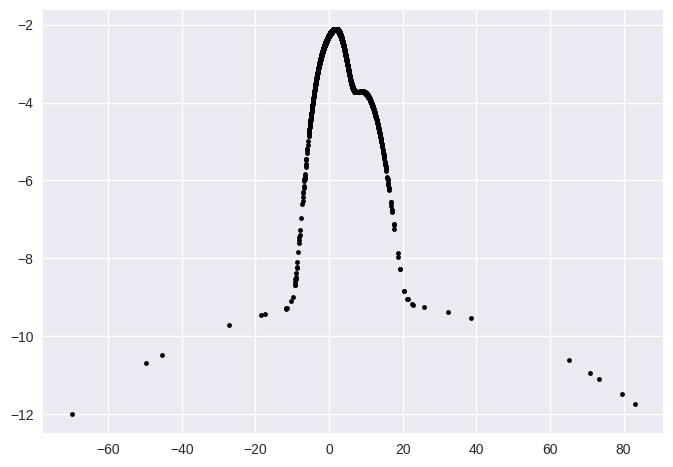

In [142]:
# Calculate the log likelihood for each point in the noisy data
log_likelihood = np.array([clf.score_samples([[yy]]) for yy in y.reshape(-1)])

# Plot the log likelihood of the noisy points against their values
plt.plot(y, log_likelihood, '.k')  # Use black dots to represent the log likelihood values

In [143]:
# Identify the indices of points with log likelihood less than -9.5, which are considered outliers
detected_outliers = np.where(log_likelihood < -9.5)[0]

# Print the true outlier indices
print("True outliers:")
print(np.sort(true_outliers))  # Sort and display the true outliers

# Print the detected outlier indices
print("\nDetected outliers:")
print(np.sort(detected_outliers))  # Sort and display the detected outliers


True outliers:
[  99  537  705 1033 1653 1701 1871 2046 2135 2163 2222 2496 2599 2607
 2732 2893 2897 3264 3468 4373]

Detected outliers:
[  99 1033 2046 2135 2163 2496 2599 2607 2893 2897]


The algorithm misses a few of these points, which is expected since some of the "outliers" actually fall within the main distribution! Here are the outliers that were overlooked:

In [144]:
set(true_outliers) - set(detected_outliers)   # elements in true_outliers but not in detected_outliers

{537, 705, 1653, 1701, 1871, 2222, 2732, 3264, 3468, 4373}

And here are the non-outliers that were incorrectly labeled as outliers:

In [145]:
set(detected_outliers) - set(true_outliers)   # elements in detected_outliers but not in true_outliers

set()

Outlier detection is a crucial tool. For instance, it’s used to identify real-time anomalies during flights, which is a very serious responsibility.